In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import os
os.getcwd()

'/home/jovyan/git/rsm-mgta455-homealarm-clv'

In [4]:
churn = pd.DataFrame(
    {
        "autopay": [0.0, 0.070, 0.097, 0.103, 0.095, 0.078, 0.069, 0.059, 0.053],
        "no_autopay": [0.0, 0.122, 0.162, 0.154, 0.134, 0.120, 0.111, 0.096, 0.086],
    }
)

These are the variables used in the calculations with RMR being set to 40 because we are beginning with an analysis of the second year, growth rate of RMR set to 3\% annually, the discount rate set to 10\%, the variable and marketing costs set to 15\% and 0.05 of RMR respectively, as well as the monthly discount formula.

In [5]:
RMR = 40 
growth = 0.03
discount = 0.10
variable_cost = 0.15
marketing_cost = 0.05
monthly_discount = (1+discount)**(1/12)-1

### Calculate CLV for autopay customers

## Assumptions
1. Looking at the autopay customers who are about to start their second year, the RMR for this year will be $40 per month and increase by 3\% for each subsequent year
2. We omit the 1st year churn rate of 3.2\% because we are assuming our cohort at the start of the second year is 100\%.
3. We are calculating the cumulative product for churn for 8 years outward.
4. We are ignoring installation cost because it is the same cost for autopay and non-autopay.
5. We apply the marketing cost immediately since we are beginning our analysis at the second year and this is not the first year our cohort has been with Home Alarm so there will be marketing cost.
6. Both autopay and non-autopay payments are occurring at the end of each month so we are calculating a CLV with a pessimistic churn.
7. Because we are calculating with a pessimistic churn we are applying the discount rate in the first month.
8. Discount rate compounds monthly while RMR, marketing, and variable cost growth rates compounds annually.
9. When looking at variable and marketing costs we are considering the respective 15\% and 5\% cost to the RMR since they grow at the constant rate of 3\%.

From the churn dataframe provided we first calculate the monthly churn rate of each year for autopay users, we then find the monthly active user rate. From there we use the numpy.cumprod function to find the monthly active users over each month of the 8 year period.

In [51]:
monthly_churn = 1 - ((1 - churn['autopay'])**(1/12))
print(monthly_churn)
monthly_active = (1 - monthly_churn).repeat(12)
print(monthly_active)
cumulative_monthly = np.cumprod(monthly_active)
print(cumulative_monthly)

0    0.000000
1    0.006029
2    0.008467
3    0.009017
4    0.008284
5    0.006745
6    0.005940
7    0.005055
8    0.004528
Name: autopay, dtype: float64
0    1.000000
0    1.000000
0    1.000000
0    1.000000
0    1.000000
       ...   
8    0.995472
8    0.995472
8    0.995472
8    0.995472
8    0.995472
Name: autopay, Length: 108, dtype: float64
0    1.000000
0    1.000000
0    1.000000
0    1.000000
0    1.000000
       ...   
8    0.531025
8    0.528621
8    0.526228
8    0.523845
8    0.521473
Name: autopay, Length: 108, dtype: float64


This code below calculates the customer profit by subtracting the variable cost and marketing cost, these grow at the same 3\% rate annually as the RMR, so they can be subtracted outright as a percentage of the RMR.

In [72]:
RMRyear = np.repeat(RMR, 108)
profit = RMRyear*(1 - variable_cost - marketing_cost)
print(profit)

[32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32.
 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32.
 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32.
 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32.
 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32.
 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32.]


To calculate the growth rate of the RMR, below is a numpy array created that has the annually compounding growth rate that will be multiplied by the RMR.

In [35]:
j = np.array([0,1,2,3,4,5,6,7,8])
growth_rate = ((1+growth)**j).repeat(12)
print(growth_rate)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.03      , 1.03      , 1.03      ,
       1.03      , 1.03      , 1.03      , 1.03      , 1.03      ,
       1.03      , 1.03      , 1.03      , 1.03      , 1.0609    ,
       1.0609    , 1.0609    , 1.0609    , 1.0609    , 1.0609    ,
       1.0609    , 1.0609    , 1.0609    , 1.0609    , 1.0609    ,
       1.0609    , 1.092727  , 1.092727  , 1.092727  , 1.092727  ,
       1.092727  , 1.092727  , 1.092727  , 1.092727  , 1.092727  ,
       1.092727  , 1.092727  , 1.092727  , 1.12550881, 1.12550881,
       1.12550881, 1.12550881, 1.12550881, 1.12550881, 1.12550881,
       1.12550881, 1.12550881, 1.12550881, 1.12550881, 1.12550881,
       1.15927407, 1.15927407, 1.15927407, 1.15927407, 1.15927407,
       1.15927407, 1.15927407, 1.15927407, 1.15927407, 1.15927407,
       1.15927407, 1.15927407, 1.1940523 , 1.1940523 , 1.19405

The expected profit on average can be found by multiplying the customer profit and the annual growth rate from above.

In [42]:
exp_profit = profit * growth_rate
print(exp_profit)

[32.         32.         32.         32.         32.         32.
 32.         32.         32.         32.         32.         32.
 32.96       32.96       32.96       32.96       32.96       32.96
 32.96       32.96       32.96       32.96       32.96       32.96
 33.9488     33.9488     33.9488     33.9488     33.9488     33.9488
 33.9488     33.9488     33.9488     33.9488     33.9488     33.9488
 34.967264   34.967264   34.967264   34.967264   34.967264   34.967264
 34.967264   34.967264   34.967264   34.967264   34.967264   34.967264
 36.01628192 36.01628192 36.01628192 36.01628192 36.01628192 36.01628192
 36.01628192 36.01628192 36.01628192 36.01628192 36.01628192 36.01628192
 37.09677038 37.09677038 37.09677038 37.09677038 37.09677038 37.09677038
 37.09677038 37.09677038 37.09677038 37.09677038 37.09677038 37.09677038
 38.20967349 38.20967349 38.20967349 38.20967349 38.20967349 38.20967349
 38.20967349 38.20967349 38.20967349 38.20967349 38.20967349 38.20967349
 39.35596369 39.35

The discounted RMR can be calculated by dividing the expected profit by 1 plus the monthly discount formula to the power of 108 for each month of the 8 years.

In [44]:
i = np.array(range(108))
discounted = exp_profit / ((1+monthly_discount)**i) 
print(discounted)

[32.         31.74684619 31.49569509 31.24653087 30.9993378  30.75410028
 30.51080286 30.26943017 30.029967   29.79239823 29.55670888 29.32288409
 29.96363636 29.72659234 29.49142359 29.25811527 29.02665266 28.79702117
 28.56920631 28.3431937  28.1189691  27.89651834 27.67582741 27.45688237
 28.0568595  27.8349001  27.61469663 27.39623521 27.17950204 26.96448346
 26.75116591 26.53953592 26.32958015 26.12128536 25.91463839 25.70962622
 26.27142299 26.06358828 25.85739776 25.65283842 25.44989736 25.24856179
 25.04881899 24.85065636 24.65406142 24.45902174 24.26552504 24.0735591
 24.59960516 24.4049963  24.21192699 24.02038507 23.83035844 23.64183513
 23.45480323 23.26925096 23.0851666  22.90253854 22.72135526 22.54160534
 23.03417574 22.85195108 22.671168   22.49181511 22.31388109 22.13735471
 21.96222485 21.78848044 21.61611054 21.44510427 21.27545084 21.10713954
 21.56836456 21.39773601 21.22845731 21.06051778 20.89390684 20.72861396
 20.56462872 20.40194078 20.24053987 20.08041582 19.

Lastly we can find the CLV of autopay customers by multiplying the discounted expected profits by the monthly churn rate, then by taking the sum of values from the second through ninth year we have our CLV for autopay customers __(1627.2852337064621)__.

In [142]:
pv_profit = discounted * cumulative_monthly
print(pv_profit)
npv = np.cumsum(pv_profit[12:])
print(npv)
autopay_clv = sum(pv_profit[12:])
print(autopay_clv)

0    32.000000
0    31.746846
0    31.495695
0    31.246531
0    30.999338
       ...    
8     9.498955
8     9.381140
8     9.264786
8     9.149875
8     9.036389
Name: autopay, Length: 108, dtype: float64
1      29.782976
1      59.152188
1      88.113383
1     116.672229
1     144.834317
        ...     
8    1590.453044
8    1599.834184
8    1609.098970
8    1618.248845
8    1627.285234
Name: autopay, Length: 96, dtype: float64
1627.2852337064621


### Calculate CLV for non-autopay customers

## Assumptions
1. Looking at the non-autopay customers who are about to start their second year, the RMR for this year will be $40 per month and increase by 3\% for each subsequent year.
2. We omit the 1st year churn rate of 8.4\% because we are assuming our cohort for non-autopay at the start of the second year is 100\%.
3. We are calculating the cumulative product for churn for 8 years out.
4. We are ignoring installation cost because it is the same cost for autopay and non-autopay.
5. We apply the marketing cost immediately since we are beginning our analysis at the second year and this is not the first year our cohort has been with Home Alarm so there will be marketing cost.
6. Both autopay and non-autopay payments are occurring at the end of each month so we are calculating a CLV with a pessimistic churn.
7. Because we are calculating with a pessimistic churn we are applying the discount rate in the first month.
8. Discount rate compounds monthly while RMR, marketing, and variable cost growth rates compounds annually.
9. When looking at variable and marketing costs we are considering the respective 15\% and 5\% cost to the RMR since they grow at the constant rate of 3\%.

We are using the same variables as above to calculate the CLV for non-autopay customers. 

From the churn dataframe provided we first calculate the monthly churn rate of each year for non-autopay users, we then find the monthly active user rate. From there we use the numpy.cumprod function to find the monthly active users over the 8 year period.

In [60]:
monthly_churn2 = 1 - ((1 - churn['no_autopay'])**(1/12))
print(monthly_churn2)
monthly_active2 = (1 - monthly_churn2).repeat(12)
print(monthly_active2)
cumulative_monthly2 = np.cumprod(monthly_active2)
print(cumulative_monthly2)

0    0.000000
1    0.010784
2    0.014620
3    0.013840
4    0.011918
5    0.010596
6    0.009757
7    0.008375
8    0.007466
Name: no_autopay, dtype: float64
0    1.000000
0    1.000000
0    1.000000
0    1.000000
0    1.000000
       ...   
8    0.992534
8    0.992534
8    0.992534
8    0.992534
8    0.992534
Name: no_autopay, Length: 108, dtype: float64
0    1.000000
0    1.000000
0    1.000000
0    1.000000
0    1.000000
       ...   
8    0.359041
8    0.356360
8    0.353700
8    0.351059
8    0.348438
Name: no_autopay, Length: 108, dtype: float64


This code below calculates the customer profit by subtracting the variable cost and marketing cost, these grow at the same 3\% rate annually as the RMR, so they can be subtracted outright as a percentage of the RMR. 

#### The following code, until where the net present value is calculated, is the same as the above calculations for autopay customers.

In [53]:
RMRyear = np.repeat(RMR, 108)
profit = RMRyear*(1 - variable_cost - marketing_cost)

To calculate the growth rate of the RMR, below is a numpy array created that has the annually compounding growth rate that will be multiplied by the RMR.

In [54]:
j = np.array([0,1,2,3,4,5,6,7,8])
growth_rate = ((1+growth)**j).repeat(12)
print(growth_rate)

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.03       1.03       1.03       1.03       1.03       1.03
 1.03       1.03       1.03       1.03       1.03       1.03
 1.0609     1.0609     1.0609     1.0609     1.0609     1.0609
 1.0609     1.0609     1.0609     1.0609     1.0609     1.0609
 1.092727   1.092727   1.092727   1.092727   1.092727   1.092727
 1.092727   1.092727   1.092727   1.092727   1.092727   1.092727
 1.12550881 1.12550881 1.12550881 1.12550881 1.12550881 1.12550881
 1.12550881 1.12550881 1.12550881 1.12550881 1.12550881 1.12550881
 1.15927407 1.15927407 1.15927407 1.15927407 1.15927407 1.15927407
 1.15927407 1.15927407 1.15927407 1.15927407 1.15927407 1.15927407
 1.1940523  1.1940523  1.1940523  1.1940523  1.1940523  1.1940523
 1.1940523  1.1940523  1.1940523  1.1940523  1.1940523  1.1940523
 1.22987387 1.22987387 1.22987387 1.22987387 1.22987387 1.22987387
 1.22987387 1.22987387 1.22987387 1.2

The expected profit on average can be found by multiplying the customer profit and the annual growth rate from above.

In [55]:
exp_profit = profit * growth_rate
print(exp_profit)

[32.         32.         32.         32.         32.         32.
 32.         32.         32.         32.         32.         32.
 32.96       32.96       32.96       32.96       32.96       32.96
 32.96       32.96       32.96       32.96       32.96       32.96
 33.9488     33.9488     33.9488     33.9488     33.9488     33.9488
 33.9488     33.9488     33.9488     33.9488     33.9488     33.9488
 34.967264   34.967264   34.967264   34.967264   34.967264   34.967264
 34.967264   34.967264   34.967264   34.967264   34.967264   34.967264
 36.01628192 36.01628192 36.01628192 36.01628192 36.01628192 36.01628192
 36.01628192 36.01628192 36.01628192 36.01628192 36.01628192 36.01628192
 37.09677038 37.09677038 37.09677038 37.09677038 37.09677038 37.09677038
 37.09677038 37.09677038 37.09677038 37.09677038 37.09677038 37.09677038
 38.20967349 38.20967349 38.20967349 38.20967349 38.20967349 38.20967349
 38.20967349 38.20967349 38.20967349 38.20967349 38.20967349 38.20967349
 39.35596369 39.35

The discounted RMR can be calculated by dividing the expected profit by 1 plus the monthly discount formula to the power of 108.

In [56]:
i = np.array(range(108))
discounted = exp_profit / ((1+monthly_discount)**i) 
print(discounted)

[32.         31.74684619 31.49569509 31.24653087 30.9993378  30.75410028
 30.51080286 30.26943017 30.029967   29.79239823 29.55670888 29.32288409
 29.96363636 29.72659234 29.49142359 29.25811527 29.02665266 28.79702117
 28.56920631 28.3431937  28.1189691  27.89651834 27.67582741 27.45688237
 28.0568595  27.8349001  27.61469663 27.39623521 27.17950204 26.96448346
 26.75116591 26.53953592 26.32958015 26.12128536 25.91463839 25.70962622
 26.27142299 26.06358828 25.85739776 25.65283842 25.44989736 25.24856179
 25.04881899 24.85065636 24.65406142 24.45902174 24.26552504 24.0735591
 24.59960516 24.4049963  24.21192699 24.02038507 23.83035844 23.64183513
 23.45480323 23.26925096 23.0851666  22.90253854 22.72135526 22.54160534
 23.03417574 22.85195108 22.671168   22.49181511 22.31388109 22.13735471
 21.96222485 21.78848044 21.61611054 21.44510427 21.27545084 21.10713954
 21.56836456 21.39773601 21.22845731 21.06051778 20.89390684 20.72861396
 20.56462872 20.40194078 20.24053987 20.08041582 19.

#### The code below uses the new variable cumulative_monthly2 to calculate the CLV of non-autopay users.

Lastly we can find the CLV of non-autopay customers by multiplying the discounted expected profits by the monthly churn rate, then by taking the sum of values from the second through ninth year we have our CLV for non-autopay customers __(1361.456029065212)__.

In [127]:
pv_profit2 = discounted * cumulative_monthly2
print(pv_profit2)
npv2 = np.cumsum(pv_profit2[12:])
print(npv2)
nonautopay_clv = sum(pv_profit2[12:])
print(nonautopay_clv)

0    32.000000
0    31.746846
0    31.495695
0    31.246531
0    30.999338
       ...    
8     6.422503
8     6.324125
8     6.227254
8     6.131867
8     6.037941
Name: no_autopay, Length: 108, dtype: float64
1      29.640514
1      58.729430
1      87.277015
1     115.293341
1     142.788295
        ...     
8    1336.734842
8    1343.058967
8    1349.286221
8    1355.418088
8    1361.456029
Name: no_autopay, Length: 96, dtype: float64
1361.456029065212


### Create a line graph of CLV for both autopay and non-autopay customer 

    Months Payment Type          CLV
1        1      autopay    29.782976
1        2      autopay    59.152188
1        3      autopay    88.113383
1        4      autopay   116.672229
1        5      autopay   144.834317
..     ...          ...          ...
8       92   no_autopay  1336.734842
8       93   no_autopay  1343.058967
8       94   no_autopay  1349.286221
8       95   no_autopay  1355.418088
8       96   no_autopay  1361.456029

[192 rows x 3 columns]


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3418: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  exec(code_obj, self.user_global_ns, self.user_ns)


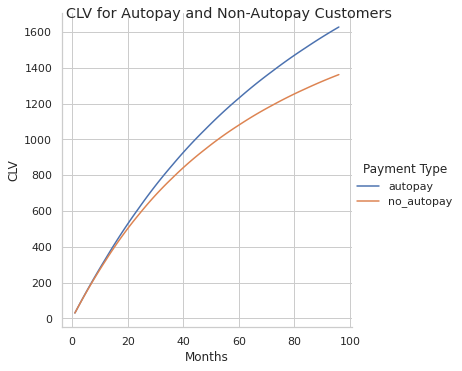

In [137]:
j = list(range(1,97))
ap = ["autopay"]
ap = np.repeat(ap, 96)
nap = ["no_autopay"]
nap = np.repeat(nap, 96)

autopay_dict = {"Months": j, "Payment Type": ap, "CLV": npv}
nonautopay_dict = {"Months": j, "Payment Type": nap, "CLV": npv2}

df1= pd.DataFrame(data=autopay_dict)
df2= pd.DataFrame(data=nonautopay_dict)
df= df1.append(df2)
print(df)

melt = pd.melt(df, id_vars = ["Months"], var_name= "Payment Type", value_name='CLV')
sns.set(style = 'whitegrid')
b = sns.relplot(x = "Months", y= "CLV", hue = "Payment Type", data=df, kind = "line")
b.fig.suptitle("CLV for Autopay and Non-Autopay Customers")
plt.show()

### Create a line graph of the retention rate for both autopay and non-autopay customer 

    Months Payment Type  Retention
1        1      autopay   0.993971
1        2      autopay   0.987978
1        3      autopay   0.982021
1        4      autopay   0.976100
1        5      autopay   0.970215
..     ...          ...        ...
8       92   no_autopay   0.359041
8       93   no_autopay   0.356360
8       94   no_autopay   0.353700
8       95   no_autopay   0.351059
8       96   no_autopay   0.348438

[192 rows x 3 columns]


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3418: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 0.98, 'Retention Rate for Autopay and Non-Autopay Customers')

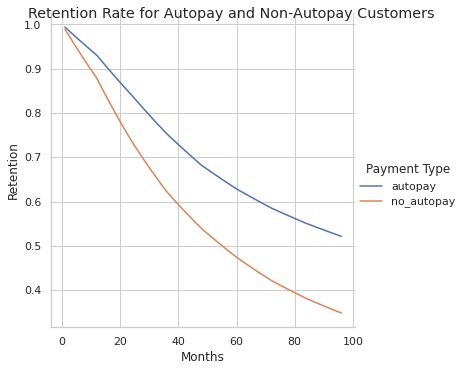

In [133]:
j = list(range(1,97))
ap = ["autopay"]
ap = np.repeat(ap, 96)
nap = ["no_autopay"]
nap = np.repeat(nap, 96)

autopay_dict = {"Months": j, "Payment Type": ap, "Retention": cumulative_monthly[12:]}
nonautopay_dict = {"Months": j, "Payment Type": nap, "Retention": cumulative_monthly2[12:]}

df1= pd.DataFrame(data=autopay_dict)
df2= pd.DataFrame(data=nonautopay_dict)
df= df1.append(df2)
print(df)

melt = pd.melt(df, id_vars = ["Months"], var_name= "Payment Type", value_name='Retention')
sns.set(style = 'whitegrid')
a = sns.relplot(x = "Months", y= "Retention", hue = "Payment Type", data=df, kind = "line")
a.fig.suptitle("Retention Rate for Autopay and Non-Autopay Customers")

### Calculate the maximum amount to spend on autopay incentives

The max pay to calculate how much Home Alarm should spend on attempting to convert customers to autopay is calculated by the autopay CLV minus the nonautopay CLV.

In [141]:
max_pay = autopay_clv - nonautopay_clv

print(f"Maxium amount to spend on autopay incentives is {round(max_pay,2)}")

Maxium amount to spend on autopay incentives is 265.83


### Suggested marketing actions

Suggest three marketing actions Home Alarm should consider to convert existing customers to autopay who are about to start their second year with Home Alarm. Be specific about incentive amounts you recommend using (if any)

1. The first marketing action I would recommend would be to offer a 10% discount for non-autopay users to convert to autopay. Most customers on monthly payment plans would rather see a drop in their monthly cost than anything else, and this discount would fall under the allowable max pay to convert the customer when considering the CLV of each.

In [143]:
max_pay_with_discount = (autopay_clv * .90) - nonautopay_clv
print(max_pay_with_discount)

103.1006812706039


2. Another marketing I would recommend home alarm to take would be to return the installation cost of \\$195 to the non-autopay customer upon their switch to autopay. Home Alarm would take on the additional cost of the installation charge of \\$195 on top of the \\$492 cost to the firm.

In [145]:
installation_fee = 195
max_pay_with_returned_fee = (autopay_clv - installation_fee) - nonautopay_clv
print(max_pay_with_returned_fee)

70.82920464125004


3. Lastly, I would create a technical service department with at home technical support at no cost to autopay user, while the non-autopay user would be charged \\$30 per visit, the autopay subscriber would be allowed one free support visit at no cost to them per year. This should be incentive enough for the non-autopay subscriber to switch to autopay assuming one technical support visit per year.

In [146]:
technical_support_cost = 30
max_pay_with_technical_support = (autopay_clv - (technical_support_cost * 8)) - nonautopay_clv
print(max_pay_with_technical_support)

25.829204641250044
